O dataset utilizado para este estudo foi o Iris. Apesar de ser uma base simples, foi possível utilizar diversos modelos diferentes de classificação.

Ações Realizadas:

    1. Importação bibliotecas e verificação do dataset
    2. Transformando o dataset para um DataFrame do pandas
    3. Verificando possíveis valores nulos/vazios e outliers
    4. Apresentação gráfica para melhor entendimento
    5. Definindo as variáveis e separando em treino e teste
    6. Aplicando os modelos de classificação
   
Conclusão:

    Utilizou-se a métrica de avaliação acurácia nesta análise para descobrir o modelo que melhor performa.
    O melhor modelo foi o que apresentou o maior valor para a métrica de avaliação escolhida. Neste caso, a Regressão Logística conseguiu obter melhores resultados diante dos demais.
    É importante ressaltar que esta análise não buscou ser exaustivo, apresentando apenas uma parte dos muitos recursos disponíveis na biblioteca Scikit-Learn. Por exemplo, poderíamos ter realizado mais análises exploratórias dos dados, testado outras operações de pré-processamento de dados, utilizado outros valores de hiperparâmetros e, ainda, experimentado outros modelos de classificação.

In [1]:
# Importando bibliotecas e o Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
base = load_iris()

In [2]:
# Verificando o dataset
base

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# Verificando as linhas do dataset
base.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# Transformando o dataset em um DataFrame
iris = pd.DataFrame(base.data)

In [5]:
# Inserindo o nome das colunas para o DataFrame
iris.columns = base.feature_names

In [6]:
# Acrescentado a coluna target
iris['target'] = base.target

In [7]:
# Verificando o dataset e o dtype dos dados
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
# Verificando as dimensões estatísticas
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Verificando valores nulos/vazios
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Plotando gráficos para entender um pouco melhor a distribuição ###

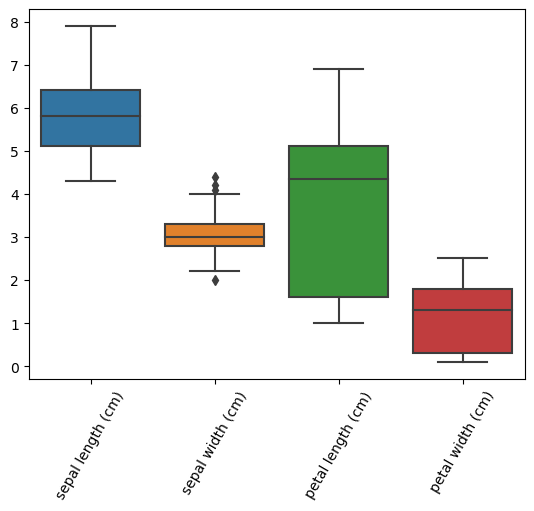

In [10]:
# Boxplot

sns.boxplot(data = iris.drop('target', axis=1))
plt.xticks(rotation=60);

<AxesSubplot:>

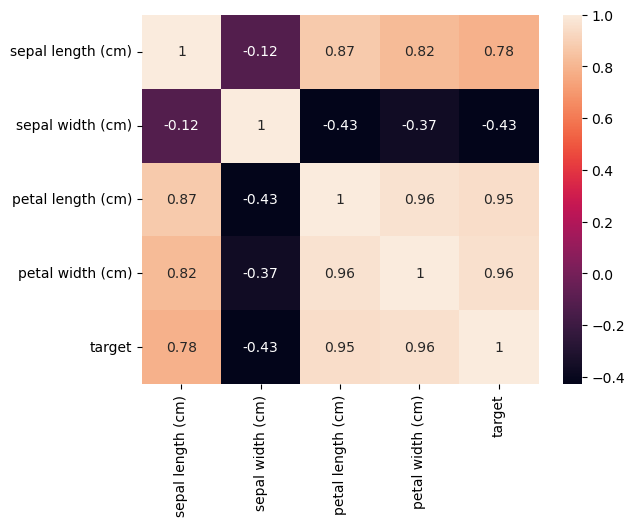

In [11]:
# Correlação com Heatmap

cor = iris.corr()
sns.heatmap(cor, annot=True)

### Preparando para implementação dos modelos de classificação

In [12]:
# Definindo as variáveis
X = iris.drop('target', axis=1)
y = iris['target']

In [13]:
# Separando em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [50]:
# Aplicando o modelo LinearSVC
model = LinearSVC(max_iter=10000)
model.fit(X_train, y_train)

LinearSVC(max_iter=10000)

In [51]:
# Verificando para a base teste
result_SVC = model.predict(X_test)

In [52]:
# Verificando os resultados
print(classification_report(y_test, result_SVC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.75      0.80        16
           2       0.79      0.88      0.83        17

    accuracy                           0.87        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.87      0.87      0.87        45



In [53]:
# Definindo alguns parâmetros
cv = KFold(n_splits = 5, shuffle = True)
scoring = 'accuracy'

In [20]:
# Criação de outros modelos para comparação
models = []
models.append(('LR', LogisticRegression(solver='newton-cg')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [42]:
# Avaliação dos modelos para treino
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.980952 (0.023328)
KNN: 0.980952 (0.023328)
CART: 0.971429 (0.023328)
NB: 0.971429 (0.038095)
SVM: 0.980952 (0.023328)


C:\Users\luans\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\luans\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [43]:
# Avaliação dos modelos para teste
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_test, y_test, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.955556 (0.054433)
KNN: 0.933333 (0.054433)
CART: 0.911111 (0.083148)
NB: 0.888889 (0.099381)
SVM: 0.888889 (0.099381)


C:\Users\luans\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\luans\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim